In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_json('/content/gdrive/MyDrive/Colab Notebooks/Major_Project/sample_data.json',lines=True)
df.head()

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,is_submitter,link_id,parent_id,permalink,retrieved_on,score,stickied,subreddit,subreddit_id,author_cakeday
0,Dethcola,,Clairemont,A quarry,True,0,1506816000,None,0,0,dnqik14,False,t3_73ieyz,t3_73ieyz,/r/sandiego/comments/73ieyz/best_place_for_gra...,1509189606,3,False,sandiego,t5_2qq2q,NaN
1,PennyBotV2,flair2-penny1,The Bot,[Salutations! I'm not sure what you said.](htt...,True,0,1506816000,None,0,0,dnqik15,False,t3_73g740,t1_dnqiiv7,/r/RWBY/comments/73g740/ruby_gives_greetings_a...,1509189606,3,False,RWBY,t5_2vhg0,NaN
2,Sir_Firebum,HOU-wagon,Astros Bandwagon,I got into baseball at about he same time Matt...,True,0,1506816000,None,0,0,dnqik16,False,t3_73hlwn,t1_dnqc3lu,/r/baseball/comments/73hlwn/matt_cain_in_his_f...,1509189606,2,False,baseball,t5_2qm7u,NaN
3,deanzynut,woodcutting,99 wcing btw,FUCKING TORY,True,0,1506816000,None,0,0,dnqik17,True,t3_73gw9b,t1_dnqdo99,/r/2007scape/comments/73gw9b/carls_platebody/d...,1509189606,18,False,2007scape,t5_2wbww,NaN
4,OfullOstomacheO,None,None,I see a water dragon,True,0,1506816000,None,0,0,dnqik18,False,t3_73i6z3,t3_73i6z3,/r/mildlyinteresting/comments/73i6z3/this_bric...,1509189606,1,False,mildlyinteresting,t5_2ti4h,NaN


In [4]:
df.shape

(10000, 21)

In [5]:
df.columns

Index(['author', 'author_flair_css_class', 'author_flair_text', 'body',
       'can_gild', 'controversiality', 'created_utc', 'distinguished',
       'edited', 'gilded', 'id', 'is_submitter', 'link_id', 'parent_id',
       'permalink', 'retrieved_on', 'score', 'stickied', 'subreddit',
       'subreddit_id', 'author_cakeday'],
      dtype='object')

Dropping out some columns which seems less important towards the predictions

In [6]:
df1=df.drop(columns=['author_flair_css_class','author_flair_text','distinguished','id','link_id','parent_id','permalink','author_cakeday','subreddit_id'])
df1.head()

,author,body,can_gild,controversiality,created_utc,edited,gilded,is_submitter,retrieved_on,score,stickied,subreddit
0,Dethcola,A quarry,True,0,1506816000,0,0,False,1509189606,3,False,sandiego
1,PennyBotV2,[Salutations! I'm not sure what you said.](htt...,True,0,1506816000,0,0,False,1509189606,3,False,RWBY
2,Sir_Firebum,I got into baseball at about he same time Matt...,True,0,1506816000,0,0,False,1509189606,2,False,baseball
3,deanzynut,FUCKING TORY,True,0,1506816000,0,0,True,1509189606,18,False,2007scape
4,OfullOstomacheO,I see a water dragon,True,0,1506816000,0,0,False,1509189606,1,False,mildlyinteresting


In [7]:
df1.isnull().sum()

author              0
body                0
can_gild            0
controversiality    0
created_utc         0
edited              0
gilded              0
is_submitter        0
retrieved_on        0
score               0
stickied            0
subreddit           0
dtype: int64

In [8]:
len(df1['subreddit'].unique())

2275

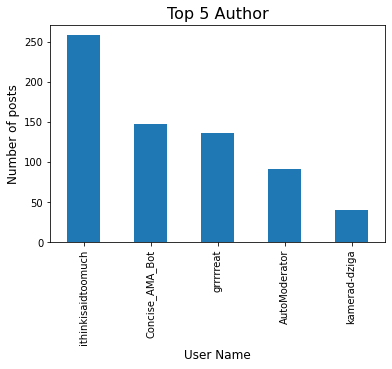

In [9]:
df1['author'].value_counts()[1:6].plot(kind='bar')
plt.title('Top 5 Author', fontsize=16)
plt.xlabel('User Name', fontsize=12)
plt.ylabel('Number of posts', fontsize=12)
plt.show()

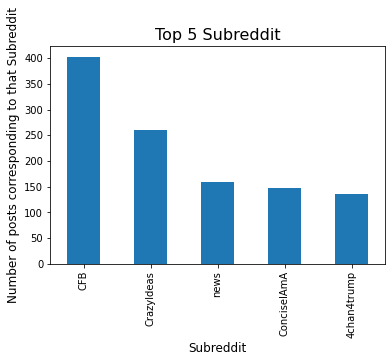

In [10]:
df1['subreddit'].value_counts()[1:6].plot(kind='bar')
plt.title('Top 5 Subreddit', fontsize=16)
plt.xlabel('Subreddit', fontsize=12)
plt.ylabel('Number of posts corresponding to that Subreddit', fontsize=12)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


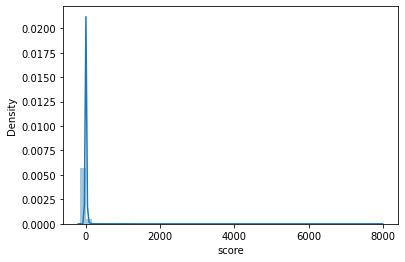

In [11]:
sns.distplot(df1['score'])#distribution of number of upvotes

In [12]:
df1['score'].describe()

count    10000.000000
mean         8.110300
std        110.980997
min       -148.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       7934.000000
Name: score, dtype: float64

In [13]:
no_down=len(df1['score'][df1.score < 0])
no_up=len(df1['score'][df1.score >= 0])
print('No of posts having negative score\n',no_down)#means downvotes is more than upvotes
print('No of posts having positive score\n',no_up)

No of posts having negative score
 305
No of posts having positive score
 9695


In [14]:
df1['controversiality'].unique()

array([0, 1])

In [15]:
df1['gilded'].unique()

array([0])

In [16]:
len(df1['edited'].unique())

321

In [17]:
df1['stickied'].unique()

array([False,  True])

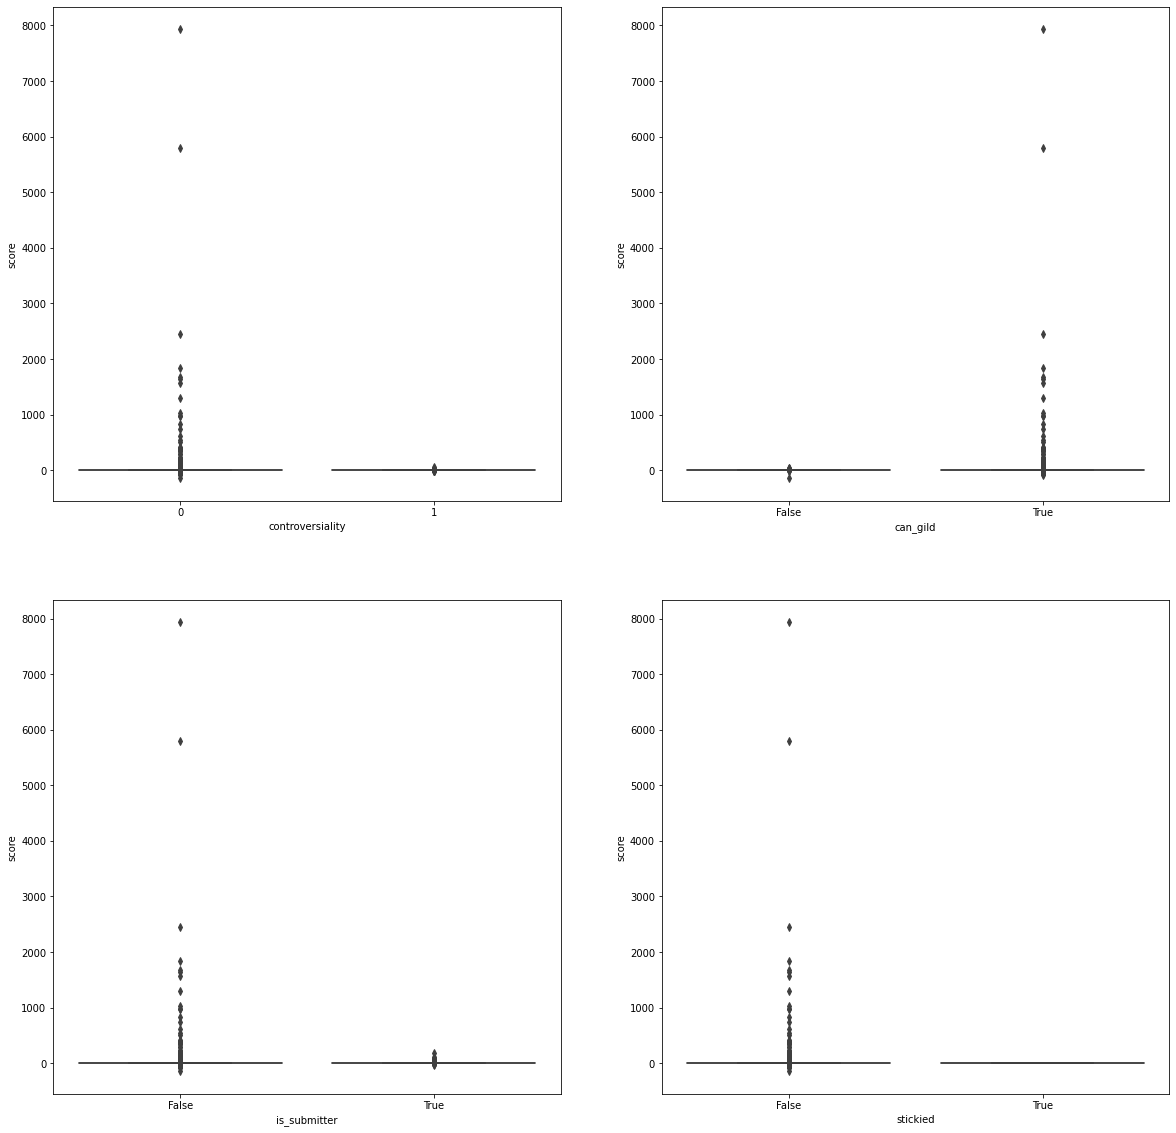

In [18]:
fig,axes=plt.subplots(2,2,figsize=(20,20))
sns.boxplot(x=df1['controversiality'],y=df1['score'],ax=axes[0,0])
sns.boxplot(x=df1['can_gild'],y=df1['score'],ax=axes[0,1])
sns.boxplot(x=df1['is_submitter'],y=df1['score'],ax=axes[1,0])
sns.boxplot(x=df1['stickied'],y=df1['score'],ax=axes[1,1])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


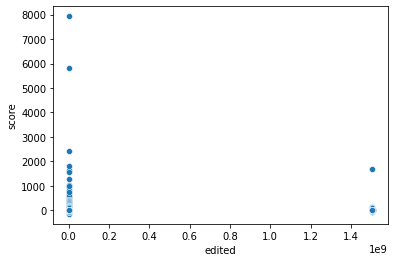

In [19]:
sns.scatterplot(df1['edited'],df1['score'])

We can drop the gilded column as it is containing single value for all the rows.

In [20]:
len(df1['created_utc'].unique())

313

In [21]:
len(df1['retrieved_on'].unique())

107

In [22]:
df1.tail(2)

,author,body,can_gild,controversiality,created_utc,edited,gilded,is_submitter,retrieved_on,score,stickied,subreddit
9998,danman794,Dude thicc always gets me,True,0,1506816312,0,0,True,1509189733,2,False,premed
9999,Falloutguy100,I wasn't thinking about pushing breath. That's...,True,0,1506816312,0,0,True,1509189733,1,False,singing


Dropping gilded,author and subreddit columns from the dataframe.

In [23]:
df2=df1.drop(columns=['gilded','author','subreddit'])
df2.tail(2)

,body,can_gild,controversiality,created_utc,edited,is_submitter,retrieved_on,score,stickied
9998,Dude thicc always gets me,True,0,1506816312,0,True,1509189733,2,False
9999,I wasn't thinking about pushing breath. That's...,True,0,1506816312,0,True,1509189733,1,False


retrived_on feature tells us the time at which the post is first seen and the created_utc feature tells us the time at which post is created.We can create a feature called time_lapse which show the time between  posting and first time retriving.And also we can drop the retrived_on column as well.

In [24]:
df2['created_utc'].dtype

dtype('int64')

In [25]:
from datetime import datetime
df.shape[0]

10000

In [26]:
df2['created_utc'].dtype

dtype('int64')

In [27]:
print(datetime.fromtimestamp(df2['created_utc'][0]))


2017-10-01 00:00:00


In [28]:
def conv_timestamp_to_date(data):
  dt_obj=datetime.fromtimestamp(data)
  return dt_obj

In [29]:
df2['new_created_utc']=df2['created_utc'].apply(conv_timestamp_to_date)
df2['new_retrieved_on']=df2['retrieved_on'].apply(conv_timestamp_to_date)

In [30]:
df2.tail()

,body,can_gild,controversiality,created_utc,edited,is_submitter,retrieved_on,score,stickied,new_created_utc,new_retrieved_on
9995,"My security acts silently, so you can work, ef...",True,0,1506816312,0,False,1509189733,22,False,2017-10-01 00:05:12,2017-10-28 11:22:13
9996,[deleted],True,0,1506816312,0,False,1509189733,1,False,2017-10-01 00:05:12,2017-10-28 11:22:13
9997,Is it possible to find them in the wild?,True,0,1506816312,0,False,1509189733,1,False,2017-10-01 00:05:12,2017-10-28 11:22:13
9998,Dude thicc always gets me,True,0,1506816312,0,True,1509189733,2,False,2017-10-01 00:05:12,2017-10-28 11:22:13
9999,I wasn't thinking about pushing breath. That's...,True,0,1506816312,0,True,1509189733,1,False,2017-10-01 00:05:12,2017-10-28 11:22:13


In [31]:
df2['time_lapse']=df2['new_retrieved_on']-df2['new_created_utc']
df2.head()

,body,can_gild,controversiality,created_utc,edited,is_submitter,retrieved_on,score,stickied,new_created_utc,new_retrieved_on,time_lapse
0,A quarry,True,0,1506816000,0,False,1509189606,3,False,2017-10-01,2017-10-28 11:20:06,27 days 11:20:06
1,[Salutations! I'm not sure what you said.](htt...,True,0,1506816000,0,False,1509189606,3,False,2017-10-01,2017-10-28 11:20:06,27 days 11:20:06
2,I got into baseball at about he same time Matt...,True,0,1506816000,0,False,1509189606,2,False,2017-10-01,2017-10-28 11:20:06,27 days 11:20:06
3,FUCKING TORY,True,0,1506816000,0,True,1509189606,18,False,2017-10-01,2017-10-28 11:20:06,27 days 11:20:06
4,I see a water dragon,True,0,1506816000,0,False,1509189606,1,False,2017-10-01,2017-10-28 11:20:06,27 days 11:20:06


In [32]:
df2=pd.get_dummies(df2,columns=['can_gild','controversiality','is_submitter','stickied'],drop_first=True)
df2.head()

,body,created_utc,edited,retrieved_on,score,new_created_utc,new_retrieved_on,time_lapse,can_gild_True,controversiality_1,is_submitter_True,stickied_True
0,A quarry,1506816000,0,1509189606,3,2017-10-01,2017-10-28 11:20:06,27 days 11:20:06,1,0,0,0
1,[Salutations! I'm not sure what you said.](htt...,1506816000,0,1509189606,3,2017-10-01,2017-10-28 11:20:06,27 days 11:20:06,1,0,0,0
2,I got into baseball at about he same time Matt...,1506816000,0,1509189606,2,2017-10-01,2017-10-28 11:20:06,27 days 11:20:06,1,0,0,0
3,FUCKING TORY,1506816000,0,1509189606,18,2017-10-01,2017-10-28 11:20:06,27 days 11:20:06,1,0,1,0
4,I see a water dragon,1506816000,0,1509189606,1,2017-10-01,2017-10-28 11:20:06,27 days 11:20:06,1,0,0,0


In [33]:
df3=df2.drop(columns=['created_utc','retrieved_on','new_retrieved_on','new_created_utc'])
df3.head()

,body,edited,score,time_lapse,can_gild_True,controversiality_1,is_submitter_True,stickied_True
0,A quarry,0,3,27 days 11:20:06,1,0,0,0
1,[Salutations! I'm not sure what you said.](htt...,0,3,27 days 11:20:06,1,0,0,0
2,I got into baseball at about he same time Matt...,0,2,27 days 11:20:06,1,0,0,0
3,FUCKING TORY,0,18,27 days 11:20:06,1,0,1,0
4,I see a water dragon,0,1,27 days 11:20:06,1,0,0,0


In [34]:
def to_sec(time):
  val=time.total_seconds()
  return val

In [35]:
df3['time_lapse']=df3['time_lapse'].apply(to_sec)
df3['length']=df3['body'].apply(len)

In [36]:
df3.head(2)

,body,edited,score,time_lapse,can_gild_True,controversiality_1,is_submitter_True,stickied_True,length
0,A quarry,0,3,2373606.0,1,0,0,0,8
1,[Salutations! I'm not sure what you said.](htt...,0,3,2373606.0,1,0,0,0,72


In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df3['time_lapse']=sc.fit_transform(df3['time_lapse'].values.reshape(-1,1))
df3['score']=sc.fit_transform(df3['score'].values.reshape(-1,1))
df3['length']=sc.fit_transform(df3['length'].values.reshape(-1,1))

In [38]:
df3.head(2)

,body,edited,score,time_lapse,can_gild_True,controversiality_1,is_submitter_True,stickied_True,length
0,A quarry,0,-0.046049,1.740798,1,0,0,0,-0.457580
1,[Salutations! I'm not sure what you said.](htt...,0,-0.046049,1.740798,1,0,0,0,-0.265563


In [39]:
import nltk
df3['body'].replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def remov_stops(text):
  text1=[word.lower() for word in text.split() if word.lower() not in stop_words]
  return  " ".join(text1)

In [42]:
df3['body']=df3['body'].apply(remov_stops) #after removing stopwords
df3.head(2)

,body,edited,score,time_lapse,can_gild_True,controversiality_1,is_submitter_True,stickied_True,length
0,quarry,0,-0.046049,1.740798,1,0,0,0,-0.457580
1,salutations sure said http imgur com ttainh,0,-0.046049,1.740798,1,0,0,0,-0.265563


In [43]:
from nltk.stem.snowball import SnowballStemmer
stemmer=SnowballStemmer('english')
def stem(text):
  text1 = [stemmer.stem(word) for word in text.split()]
  return " ".join(text1)

In [44]:
df3['body']=df3['body'].apply(stem)

In [45]:
df3.head(2)

,body,edited,score,time_lapse,can_gild_True,controversiality_1,is_submitter_True,stickied_True,length
0,quarri,0,-0.046049,1.740798,1,0,0,0,-0.457580
1,salut sure said http imgur com ttainh,0,-0.046049,1.740798,1,0,0,0,-0.265563


In [46]:
df_train=df3[0:7000]
df_test=df3[7000:]
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=6000)
x_train1=df_train.drop(columns=['score','body'])


In [47]:
x1=cv.fit_transform(df_train['body'])

In [48]:
x1

<7000x6000 sparse matrix of type '<class 'numpy.float64'>'
	with 79261 stored elements in Compressed Sparse Row format>

In [49]:
x_train2=pd.DataFrame(x1.todense(),columns=cv.get_feature_names())
x_train=pd.concat([x_train1,x_train2],axis=1)


In [50]:
x_train

,edited,time_lapse,can_gild_True,controversiality_1,is_submitter_True,stickied_True,length,aa,aaaand,ab,abandon,abbi,abe,aber,abhorr,abil,abit,abl,abolish,abroad,absenc,absolut,absorb,abstain,abstract,absurd,abus,abyss,ac,academ,academia,acceler,accent,accept,access,accessori,accid,accident,accompani,accomplish,...,yes,yesterday,yet,yeti,yggdrasil,yike,yli,yo,yonko,york,yorker,yoshi,young,younger,your,youtu,youtub,youtubefactsbot,youv,yqc,yr,yt,yup,yx,zan,zarya,zealand,zeno,zero,zest,zidan,zionist,zip,ziwen,zombi,zone,zoom,zotac,zr,zt
0,0,1.740798,1,0,0,0,-0.457580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.740798,1,0,0,0,-0.265563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1.740798,1,0,0,0,-0.103550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.740798,1,0,1,0,-0.445579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1.740798,1,0,0,0,-0.418577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,-0.708370,1,0,0,0,-0.349571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6996,0,-0.708370,1,0,0,0,-0.208559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6997,0,-0.708370,1,0,0,0,0.238480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6998,0,-0.708370,1,0,0,0,-0.004541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
y_train=df_train['score']

In [52]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
x_test1=df_test.drop(columns=['score','body'])
x2=cv.fit_transform(df_test['body'])
x_test2=pd.DataFrame(x2.todense(),columns=cv.get_feature_names())
x_test=pd.concat([x_test1,x_test2],axis=1)
y_test=df_test['score']

In [54]:
x_test

,edited,time_lapse,can_gild_True,controversiality_1,is_submitter_True,stickied_True,length,aa,aaa,aaaaaaaaaahhhh,aac,aaron,aarq,ab,aba,abandon,abbott,abc,abcdefg,abe,abeckaboo,aber,abgeschreckt,abh,abid,abil,abl,ablenkungen,abolitionist,abomin,abort,about,abroad,abrupt,absatz,abschluss,abschreiben,absenc,absolut,absolv,...,ze,zeit,zeitaufwand,zeitoun,zem,zen,zendikar,zenko,zeppelin,zero,zeug,zhprh,ziemlich,zijn,zinsen,zip,zjlpjrw,zkbktt,zls,zodiac,zomba,zombi,zone,zoom,zoren,zoz,zp,zq,zu,zudem,zugang,zulaport,zullaport,zum,zunehmend,zur,zusammenh,zwar,zwei,zweier
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,-1.717951,1.0,0.0,0.0,0.0,-0.313568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,0.0,-1.717951,1.0,0.0,0.0,0.0,-0.454580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,0.0,-1.717951,1.0,0.0,0.0,0.0,-0.361572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,0.0,-1.717951,1.0,0.0,1.0,0.0,-0.406576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
y_pred=model.predict(x_test)
from sklearn.metrics import mean_absolute_error
print('MAE is',mean_absolute_error(y_test,y_pred))

ValueError: ignored